## Business Understanding

In this notebook we will look into the airbnb data, and see how users interact with listings in choosing
### Question 1: Does Holidays affect Airbnb prices?
### Question 2: Does property type affect the price for a listing?
### Question 3: Does reviews cause which neighborhood will be rented out more?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
'''
INPUT:
dfCal = calender dataframe from the csv
dfList = listing dataframe from the csv
dfRev = Listing dataframe from the csv
priceAVG = taking the average of the price with the date
priceAVGList = taking the average price of the type of proberty
priceAVGListNBH = Getting the average review with the type of neighborhoods

OUTPUT:
dfCalClean = After cleaning the data, a new dataframe is made for dfCal dataframe
dfListClean = After cleaning the data, a new dataframe is made for dfList dataframe
dfRevClean = After cleaning the data, a new dataframe is made for dfRev dataframe
'''

First I will import the data into DataFrames

In [2]:
dfCal = pd.read_csv(r"C:\Users\davim\Desktop\Data Science\Project1\archive\calendar.csv")
dfList = pd.read_csv(r"C:\Users\davim\Desktop\Data Science\Project1\archive\listings.csv")
dfRev = pd.read_csv(r"C:\Users\davim\Desktop\Data Science\Project1\archive\reviews.csv")

Ill than check the data to see what needs to be done in cleaning our data, also ill be see how my dataset will be used in my processing

# Data Understanding

In [3]:
dfCal.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [4]:
dfList.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [5]:
dfRev.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


# Data Preparation

Here Ill be cleaning up the data that I see is any results are empty, I will replace the empty value to a common value showing its empty in rows or in certain columns

In [6]:
dfCal.isna().any()

listing_id    False
date          False
available     False
price          True
dtype: bool

In [7]:
dfList.isna().any()

id                                  False
listing_url                         False
scrape_id                           False
last_scraped                        False
name                                False
                                    ...  
cancellation_policy                 False
require_guest_profile_picture       False
require_guest_phone_verification    False
calculated_host_listings_count      False
reviews_per_month                    True
Length: 92, dtype: bool

In [8]:
dfRev.isna().any()

listing_id       False
id               False
date             False
reviewer_id      False
reviewer_name    False
comments          True
dtype: bool

For dfCalClean im using .dropna() which removes missing values. dfCalClean im also using .dropna(). Finally for dfListClean, im looking at the columns which have values missing. I use .dropna() to remove missing values that will cause problems in the analysis.

In [9]:
dfCalClean = dfCal.dropna()

In [10]:
dfListClean = dfList.dropna(subset=['jurisdiction_names', 'reviews_per_month'])

In [11]:
dfRevClean = dfRev.dropna()

### Analyze the clean data

Here I will check my clean data again and see what else I need to do before I process it and set up a plot for my analyzes.

In [12]:
dfCalClean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 934542 entries, 0 to 1393213
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   listing_id  934542 non-null  int64 
 1   date        934542 non-null  object
 2   available   934542 non-null  object
 3   price       934542 non-null  object
dtypes: int64(1), object(3)
memory usage: 35.6+ MB


In [13]:
dfCalClean.sample(5)

,listing_id,date,available,price
1246315,2762241,2016-07-27,t,$100.00
251006,2931922,2016-09-11,t,$145.00
1271265,9508837,2016-12-04,t,$99.00
434351,6959336,2016-01-05,t,$129.00
479,953595,2016-04-27,t,$151.00


In [14]:
dfListClean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3191 entries, 0 to 3814
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3191 non-null   int64  
 1   listing_url                       3191 non-null   object 
 2   scrape_id                         3191 non-null   int64  
 3   last_scraped                      3191 non-null   object 
 4   name                              3191 non-null   object 
 5   summary                           3023 non-null   object 
 6   space                             2858 non-null   object 
 7   description                       3191 non-null   object 
 8   experiences_offered               3191 non-null   object 
 9   neighborhood_overview             2445 non-null   object 
 10  notes                             1990 non-null   object 
 11  transit                           2537 non-null   object 
 12  thumbn

In [15]:
dfListClean.sample(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
2510,3206305,https://www.airbnb.com/rooms/3206305,20160104002432,2016-01-04,West Seattle Greenbelt Garden Oasis,"A light filled private apartment, with windows...",INSIDE • Secure & private with separate entran...,"A light filled private apartment, with windows...",none,We're located in West Seattle on a quiet resid...,...,9.0,f,NaN,WASHINGTON,f,moderate,f,f,1,3.04
1909,4121334,https://www.airbnb.com/rooms/4121334,20160104002432,2016-01-04,Dog-friendly 2BR townhome w/ patio!,Just steps from the main street in West Seattl...,"2BR, 1.5 BA townhome that offers a private ret...",Just steps from the main street in West Seattl...,none,West Seattle is quieter and offers a more rela...,...,9.0,f,NaN,WASHINGTON,f,moderate,f,f,1,1.06
2122,6561379,https://www.airbnb.com/rooms/6561379,20160104002432,2016-01-04,Beacon Hill 2br with Park Views,Right across the street from Jefferson Park in...,This 1953 rambler-style house is a great home ...,Right across the street from Jefferson Park in...,none,The neighborhood is safe with plenty of family...,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,2.26
841,9216874,https://www.airbnb.com/rooms/9216874,20160104002432,2016-01-04,Modern Central District Townhouse,"Our 2-bed, 1.5-bath townhouse comfortably slee...",We're in an ideal location in Seattle's Centra...,"Our 2-bed, 1.5-bath townhouse comfortably slee...",none,"The Central District is a vibrant, diverse nei...",...,10.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.98
2838,2628010,https://www.airbnb.com/rooms/2628010,20160104002432,2016-01-04,Huge 2 BR/2 Bath-Heart of Cap Hill,"Amazing 2 Bedroom, 2 Bathroom Apartment on Cap...",2 huge bedrooms Both bedrooms have queen size ...,"Amazing 2 Bedroom, 2 Bathroom Apartment on Cap...",none,Capitol Hill is a fantastic neighborhood in Se...,...,9.0,f,NaN,WASHINGTON,t,strict,f,f,1,1.48


In [16]:
dfRevClean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84831 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84831 non-null  int64 
 1   id             84831 non-null  int64 
 2   date           84831 non-null  object
 3   reviewer_id    84831 non-null  int64 
 4   reviewer_name  84831 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 4.5+ MB


In [17]:
dfRevClean.sample(5)

,listing_id,id,date,reviewer_id,reviewer_name,comments
26068,1097520,7039595,2013-09-04,6396499,Justin,Jeanie is awesome and her place is incredibly ...
61007,231097,16370401,2014-07-26,93252,"Laurie With Husband, Steve",We thoroughly enjoyed Paul And Terry's beautif...
82222,80188,34539608,2015-06-09,28262156,Tim,My family came to visit me so I booked them a ...
75803,799882,10662668,2014-03-02,11887542,Stephen,I stayed with Lisa for around 3 weeks. She was...
46139,557126,8111505,2013-10-16,7362361,Jenny,Chad and Ruben were fabulous hosts. The room ...


In the analyze of the clean data I was able to come up with three questions that I feel interesting in finding out on airbnb listing

# Evaluation

# Question 1: Does holidays affect Airbnb prices?

Here I will transform the date data to soemething helpful in processing the data for my calculation and for the plot

In [18]:
import datetime
dfCalClean['date'] = pd.to_datetime(dfCalClean['date'])

In this step, im trying to clean up the price column values by removing the special characters and converting the values type. With that I am able to set up my analysis

In [19]:
dfCalClean['price'] = dfCalClean['price'].str.replace('$', '')
dfCalClean['price'] = dfCalClean['price'].str.replace(',', '')
dfCalClean['price'] = dfCalClean['price'].astype(float).astype(int)

In [20]:
dfCalClean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 934542 entries, 0 to 1393213
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   listing_id  934542 non-null  int64         
 1   date        934542 non-null  datetime64[ns]
 2   available   934542 non-null  object        
 3   price       934542 non-null  int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(1)
memory usage: 32.1+ MB


Here im trying to get the mean value of the prices by gouping with the date column. With this Im getting an avg of the price with the date to import into a plot.

In [21]:
priceAVG = dfCalClean.groupby(['date'])['price'].mean()
priceAVG = priceAVG.sort_values(ascending=False)
print(priceAVG.head())

date
2016-07-01    157.480000
2016-07-02    157.080967
2016-07-09    156.448161
2016-07-15    156.365385
2016-07-08    156.260469
Name: price, dtype: float64


Here with my data cleaning and setting up the mean for the prices value, I set up a plot for a better approach.

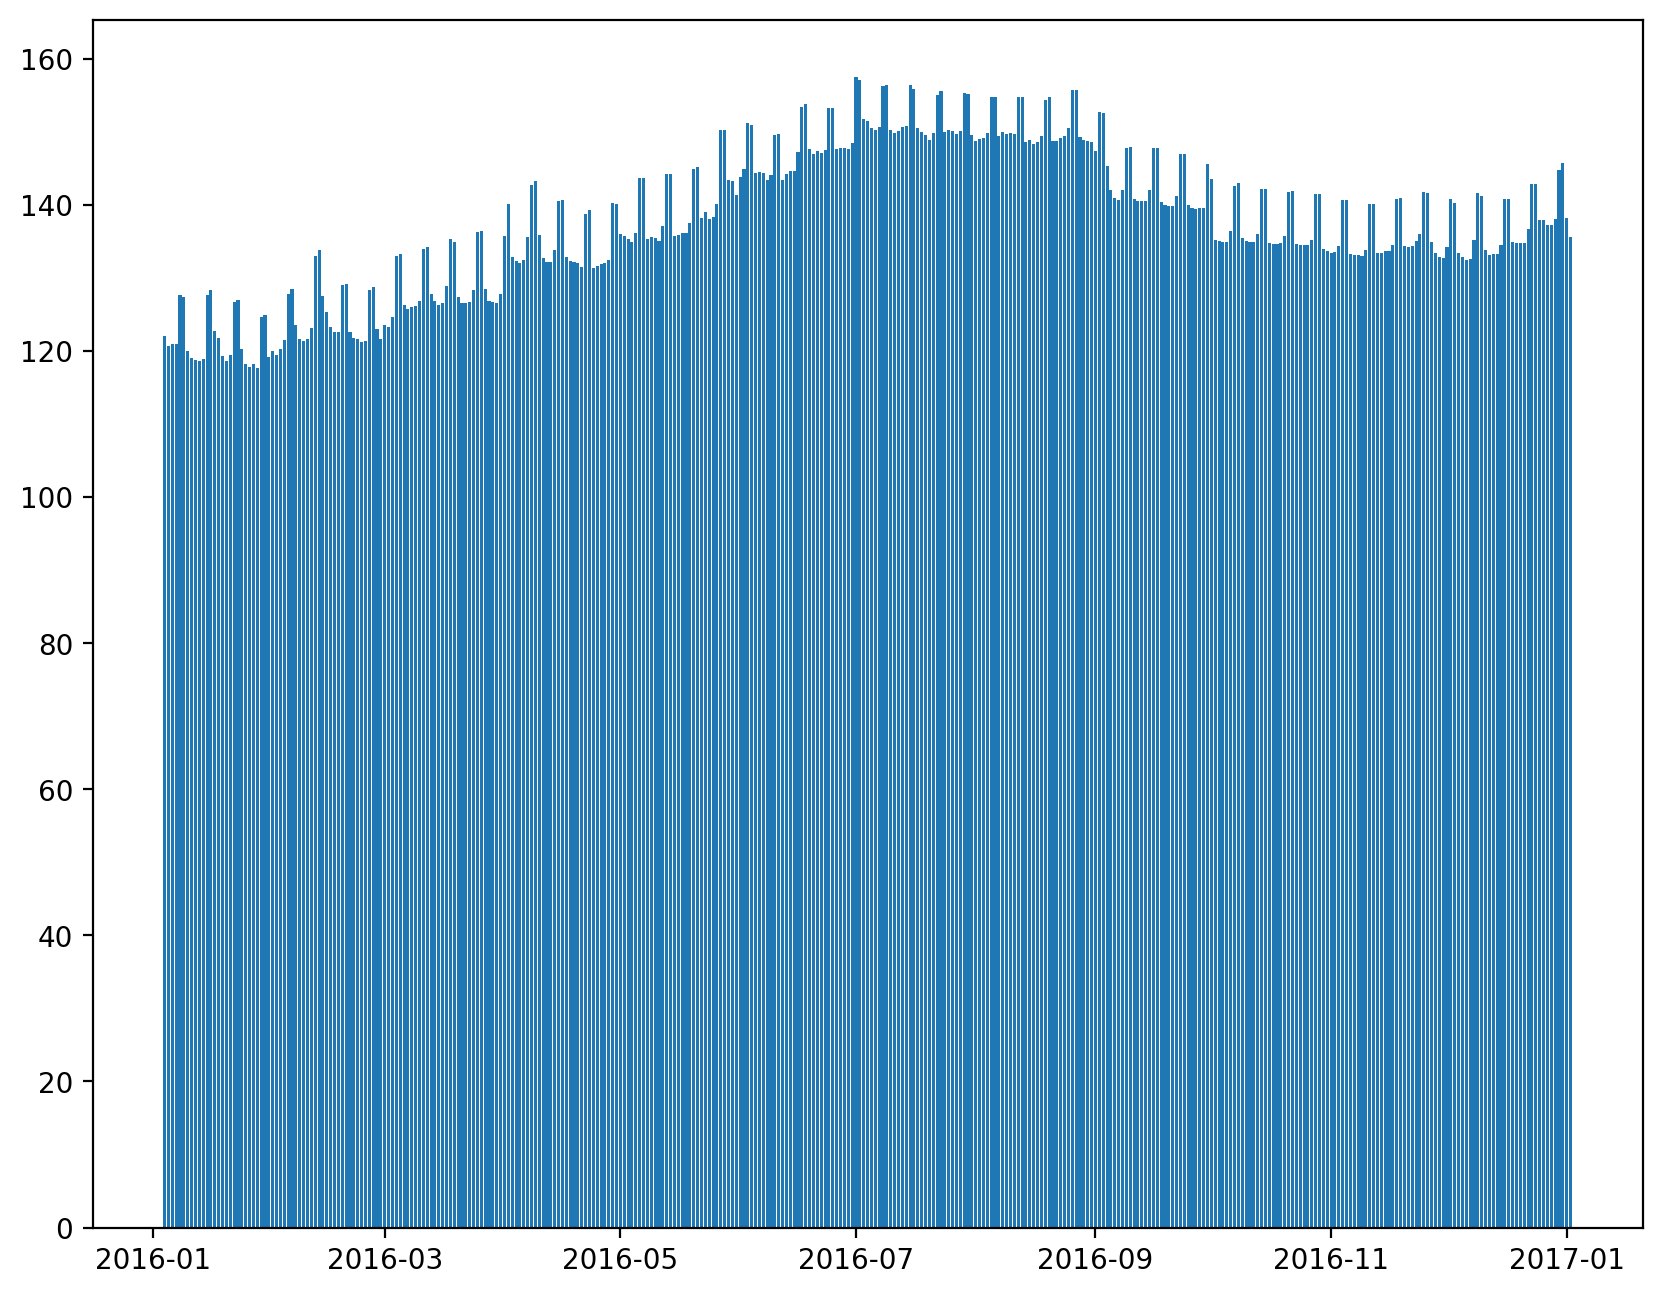

In [22]:
plt.figure(figsize=(10,8), dpi=200)
plt.bar(priceAVG.index, priceAVG)
plt.show()

Here we can see that in the summer the prices of the airbnb listings are high. For just 2016 we can see the peeck being in the summer months of june to early September where the prices are dropping.

# Question 2: Does property type affect the price for a listing?

Here Ill be doing the same what I did before in cleaning up the price value in the columns for a better experience in using the data.

In [23]:
dfListClean['price'] = dfListClean['price'].str.replace('$', '')
dfListClean['price'] = dfListClean['price'].str.replace(',', '')
dfListClean['price'] = dfListClean['price'].astype(float).astype(int)

In [24]:
priceAVGList = dfListClean.groupby(['property_type'])['price'].mean()
priceAVGList = priceAVGList.sort_values(ascending=False)
print(priceAVGList.head())

property_type
Boat           357.000000
Condominium    148.884058
Loft           137.588235
House          130.521828
Treehouse      124.000000
Name: price, dtype: float64


In this example I'm looking at the proberty type with the price. I wanted to see if the proberty type does affect the price.

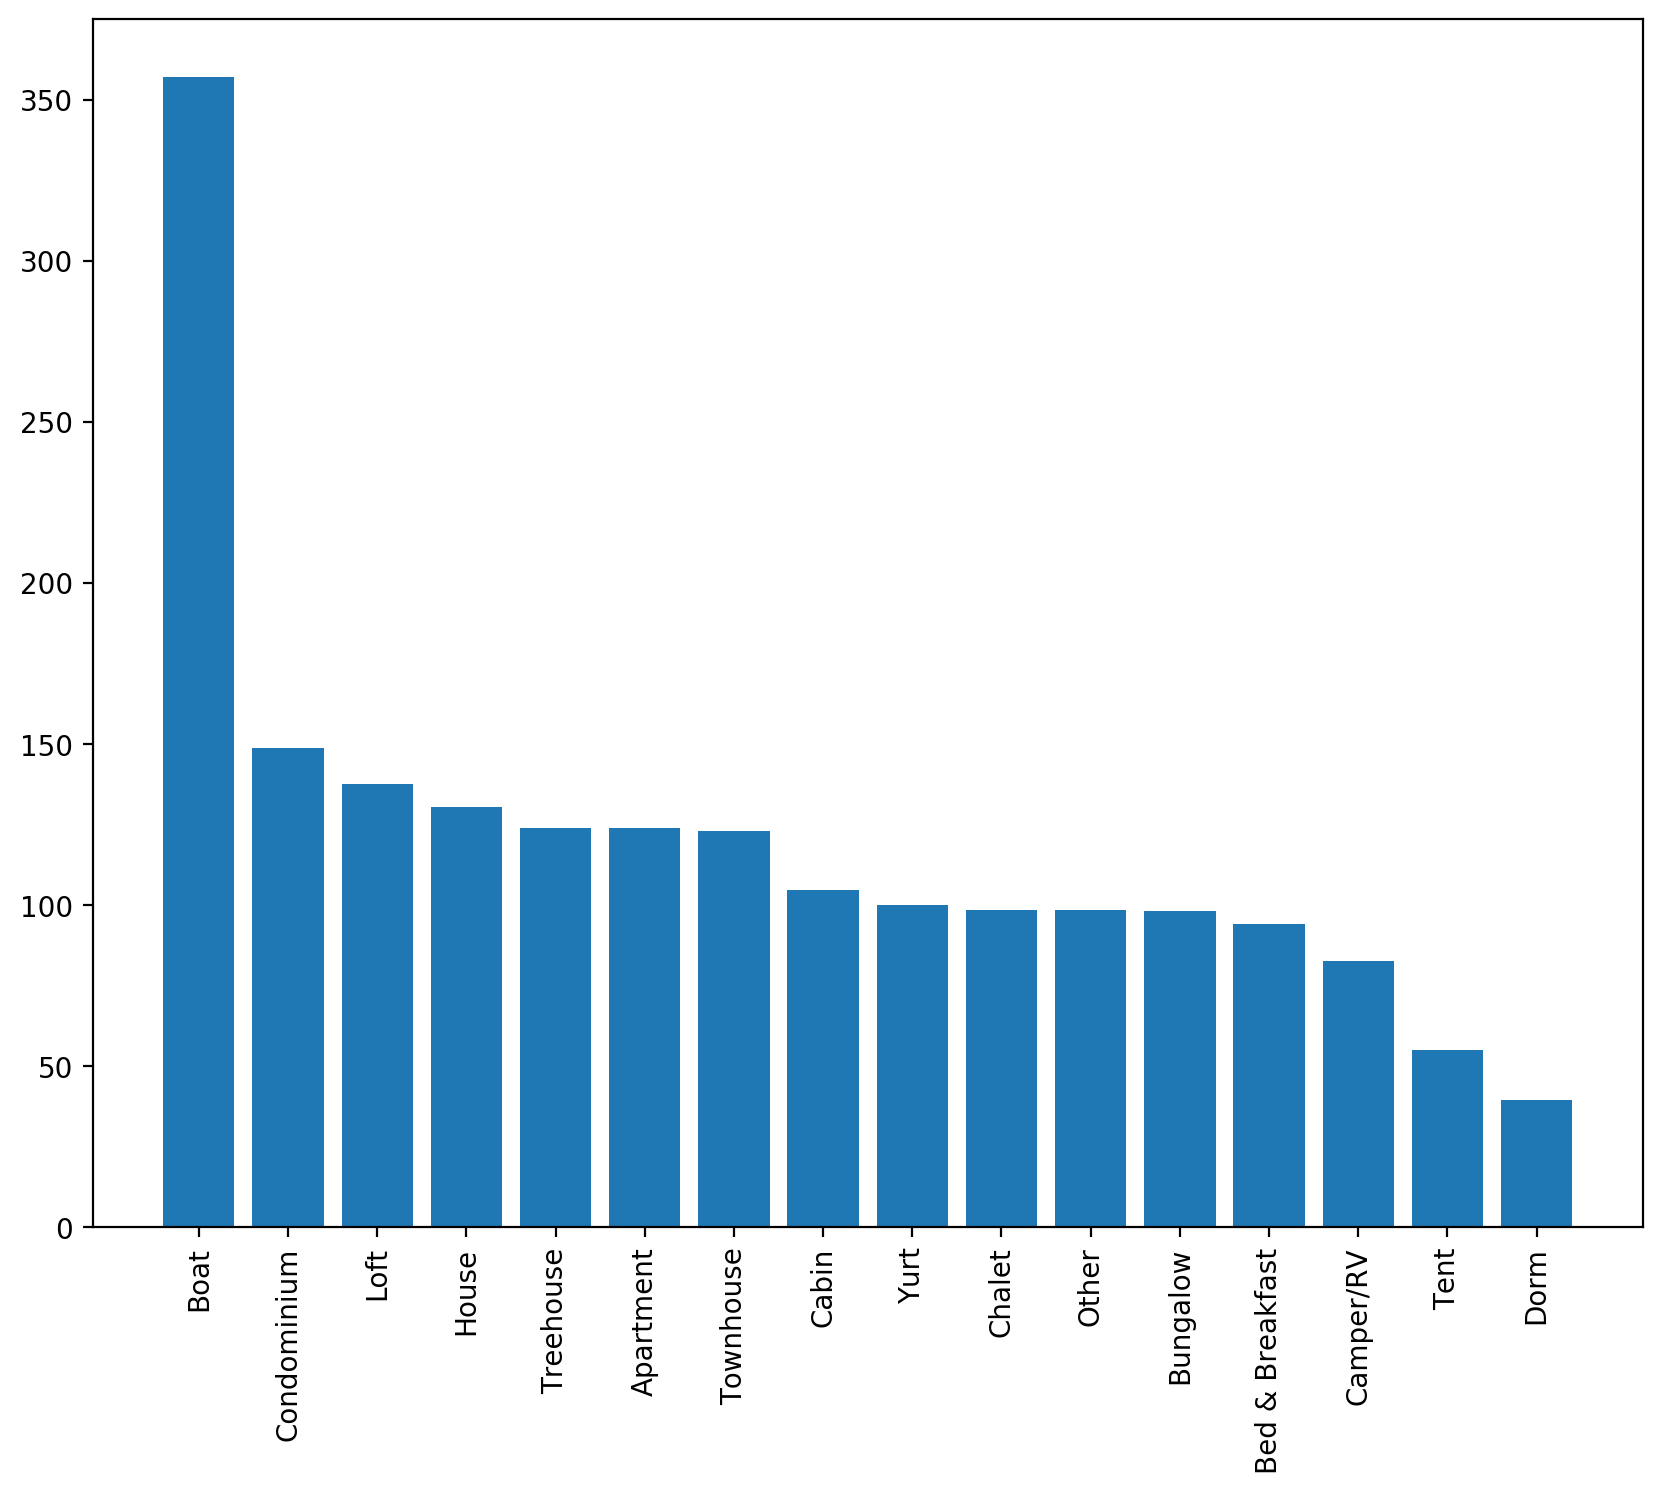

In [25]:
plt.figure(figsize=(10,8), dpi=200)
plt.bar(priceAVGList.index, priceAVGList)
plt.xticks(rotation=90)
plt.show()

In this barchart we can see theres a huge difference in price with the proberty. With sorting we can see that boats mean price is about 350 dollars and about half of that the condominium is about 150 dollars. So staying in a boat will cost you.

# Question 3: Does reviews cause which neighborhood will be rented out more?

As before, ill be taking the mean of the reviews with the nieghborhood, to see any similaritys or differences in my plot.

In [26]:
priceAVGListNBH = dfListClean.groupby(['neighbourhood'])['number_of_reviews'].mean()
priceAVGListNBH = priceAVGListNBH.sort_values(ascending=False)
print(priceAVGListNBH.head())

neighbourhood
International District    106.571429
South Delridge             66.714286
Harrison/Denny-Blaine      55.000000
Riverview                  48.375000
Highland Park              46.100000
Name: number_of_reviews, dtype: float64


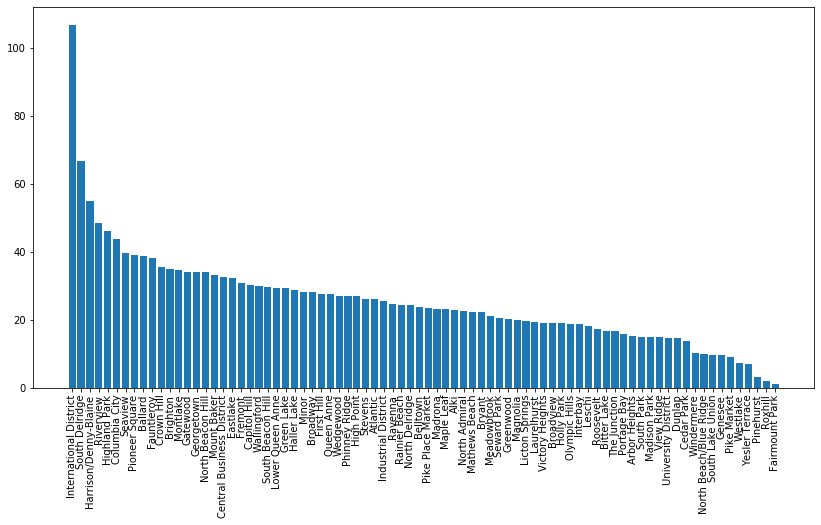

In [27]:
plt.figure(figsize=(14,7))
plt.bar(priceAVGListNBH.index, priceAVGListNBH)
plt.xticks(rotation=90)
plt.show()

## Blog link

https://medium.com/@dmoreno757/how-does-an-airbnb-listing-affect-us-in-choosing-which-one-is-the-right-one-34688f0fc31c